## TECHIN 513 HW1 – Modifying Signals

Brian Seong

(This should be a markup cell, which means that when you run it you just get formated text.)

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal as sig
import simpleaudio as sa

# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

In [2]:
# Assignment 1 - Time Scaling Function

# Part A

# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t


In [3]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

import wave
# Part B
# TODO: Code that solves B
print('Part B\n==========')
train32 = sa.WaveObject.from_wave_file('./sounds/train32.wav')
fs1 = train32.sample_rate
ch1 = train32.num_channels
train32data = train32.audio_data
print('Sampling Rate = ', fs1, 'Hz')
print('# of samples: ', len(train32data))
print('# of channels: ', ch1)

# Part C
# TODO: Code that solves C
print('\nPart C\n==========')
train32_fs, train32_data = wavfile.read('./sounds/train32.wav')
wavfile.write('./sounds/train16.wav', int(train32_fs * 0.5), train32_data)
wavfile.write('./sounds/train48.wav', int(train32_fs * 1.5), train32_data)
print("Saved file 'train16' & 'train48'")

# Part D
# TODO: Code that solves D
print('\nPart D\n==========')
wav_obj16 = sa.WaveObject.from_wave_file('./sounds/train16.wav')
wav_obj16.play().wait_done()
wav_obj32 = sa.WaveObject.from_wave_file('./sounds/train32.wav')
wav_obj32.play().wait_done()
wav_obj48 = sa.WaveObject.from_wave_file('./sounds/train48.wav')
wav_obj48.play().wait_done()
print("Played '16000Hz', '32000Hz', and '48000Hz'")



Part B
Sampling Rate =  32000 Hz
# of samples:  100626
# of channels:  1

Part C
Saved file 'train16' & 'train48'

Part D
Played '16000Hz', '32000Hz', and '48000Hz'


###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.
The lower the sampling frenquency, the longer the audio data, which lowers the pitch of the audio.
The higher the sampling frenquency, the shorter the audio data, which rises the pitch of the audio.


## Assignment 2 -- Amplitude Operations on Signals

In [4]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# TODO: Code that solves A
# Start with a comment section that explains what the input variables are
fs1, x1 = wavfile.read('./sounds/train32.wav')
n0 = int(fs1 * 0.5)
s1 = np.concatenate(
    (
        2 * (np.ones(n0, dtype=float)),
        0.2 * (np.ones(len(x1) - n0, dtype=float))
    )
    , dtype=float
)
print("s1 created")
v1 = np.multiply(x1, s1)
wavfile.write('./sounds/v1.wav', fs1, v1.astype(np.int16))
print("v1 saved")

s1 created
v1 saved


In [5]:
# Assignment 2 - Title of Assignment 2

# Part B
# TODO: Code that solves B
r1 = np.ones(len(x1), dtype=int) * np.arange(1,0,-1/len(x1))
print('r1 created')
v2 = r1 * x1
wavfile.write('./sounds/v2.wav', fs1, v2.astype(np.int16))
print('v2 saved')

# Part C
# TODO: Code that solves C
sa.WaveObject.from_wave_file('./sounds/v1.wav').play().wait_done()
sa.WaveObject.from_wave_file('./sounds/v2.wav').play().wait_done()


r1 created
v2 saved


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use? 

If I defined s1 to take value 2 for the [0, 0.5] range, the amplitude will be amplified twice as much of the original sound before 0.5 seconds, then will stay at 20% of the original amplitude till the end.
If I want a smooth but faster decay in amplitude, I might want to use v2 since its smooth, and decay as soon as it starts. But its not the fastest, using a exponential function with base that is greater than 0 but smaller than 1, ex. g(x) = (1/2)^x, and using this to multiply the original signal, then this version might be even faster than v2.

## Assignment 3 -- Time Scaling Audio Signals 

In [6]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A
def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

<IPython.core.display.Javascript object>


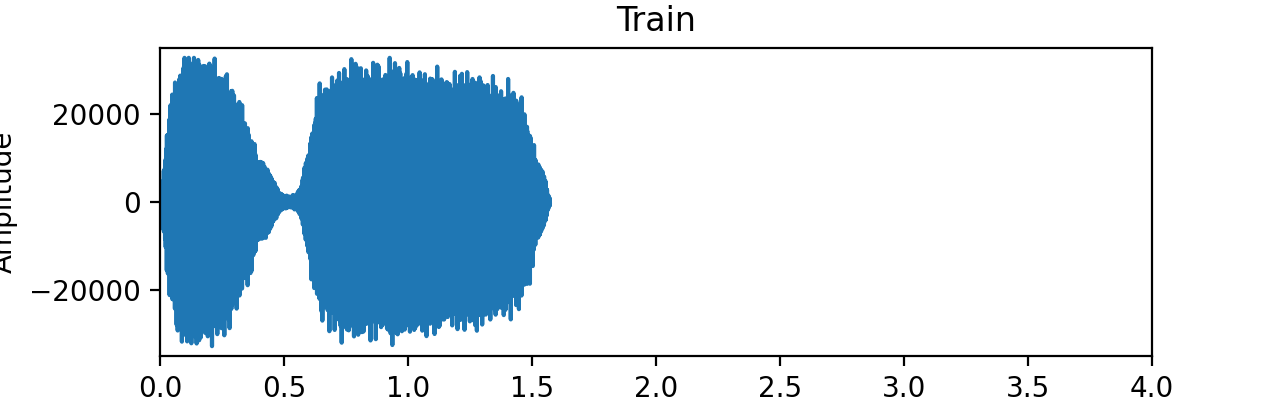

<IPython.core.display.Javascript object>


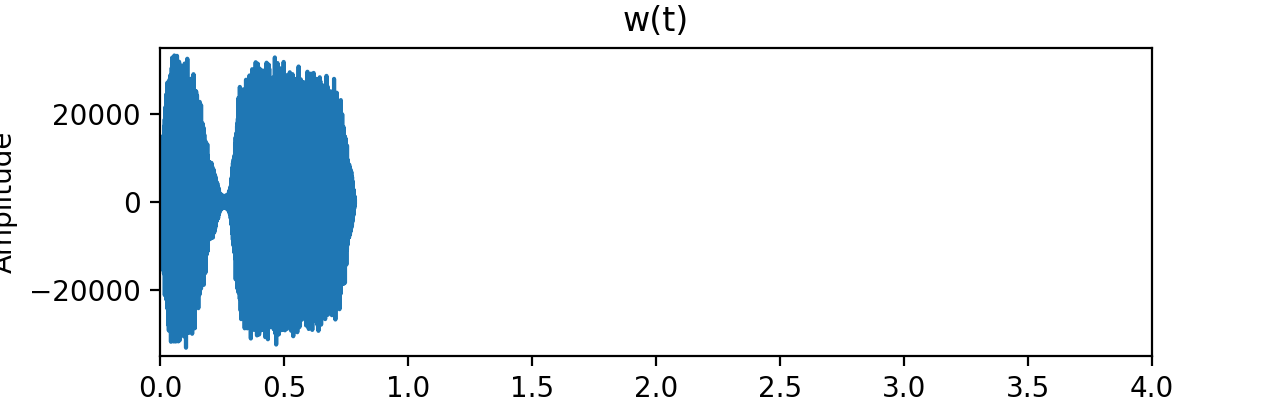

<IPython.core.display.Javascript object>


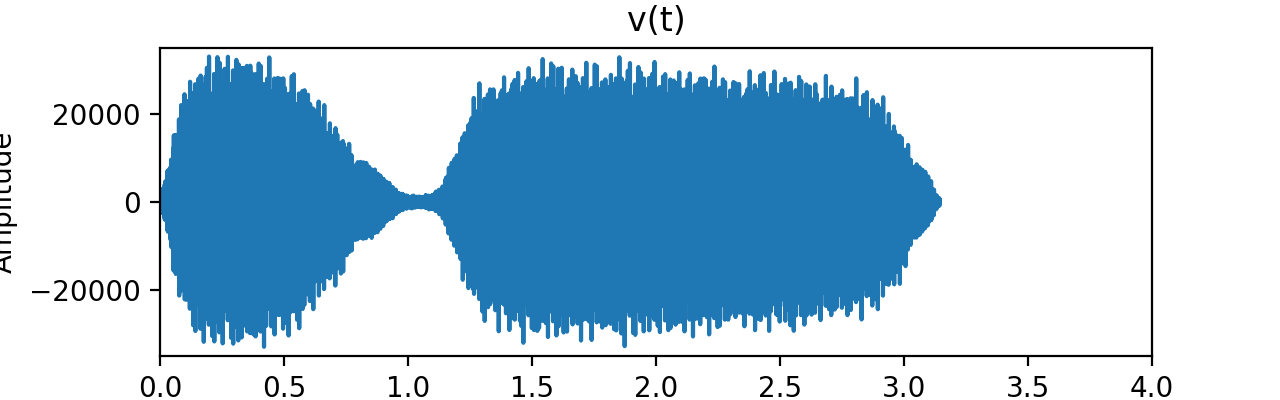

<IPython.core.display.Javascript object>


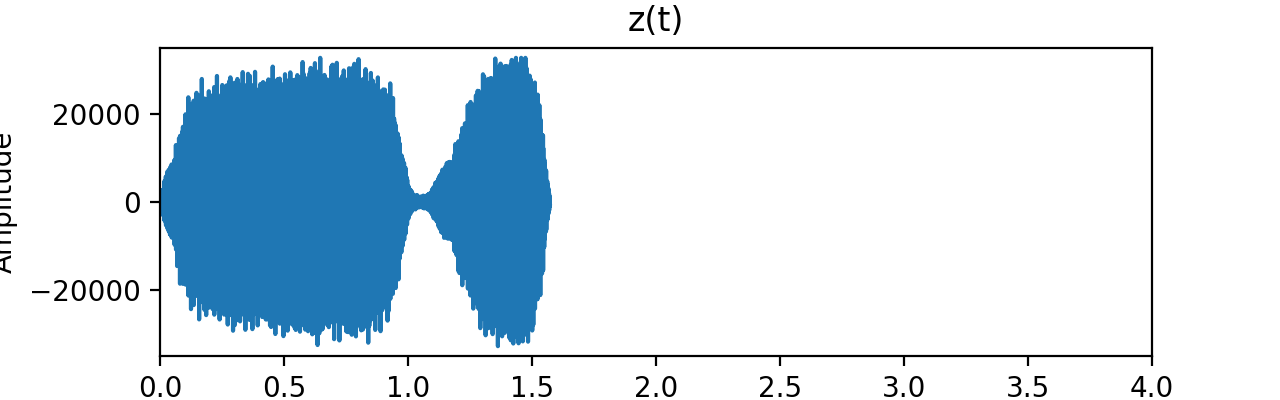

In [11]:

# Part B
# TODO: Code that solves B
w, t_w = timescale(x1, fs1, 2)
v, t_v = timescale(x1, fs1, 0.5)
z = x1[::-1]
_, t_z = timescale(x1, fs1, 1)

wavfile.write('./sounds/w.wav', fs1, w.astype(np.int16))
wavfile.write('./sounds/v.wav', fs1, v.astype(np.int16))
wavfile.write('./sounds/z.wav', fs1, z.astype(np.int16))

# Part C
# TODO: Code that solves C
plt.figure(0).set_figheight(2)
plt.plot(t_z, x1)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Train")

plt.figure(1).set_figheight(2)
plt.plot(t_w, w)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("w(t)")

plt.figure(2).set_figheight(2)
plt.plot(t_v, v)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("v(t)")

plt.figure(3).set_figheight(2)
plt.plot(t_z, z)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("z(t)")

plt.show()

# Part D
# TODO: Code that solves D
sa.WaveObject.from_wave_file('./sounds/w.wav').play().wait_done()
sa.WaveObject.from_wave_file('./sounds/v.wav').play().wait_done()
sa.WaveObject.from_wave_file('./sounds/z.wav').play().wait_done()

###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

Not sure if I get the question right, the question is asking if a student is using the 'plt.figure()' commend before every call to subplot, then what will happen to the plots? 

So with using Figure() vs NOT using Figure(), using Figure before each subplot will create 4 different plots figures. If not using Figure() then all plots will be plotted on the same figure.

## Assignment 4 -- Time Shift Operations

<IPython.core.display.Javascript object>


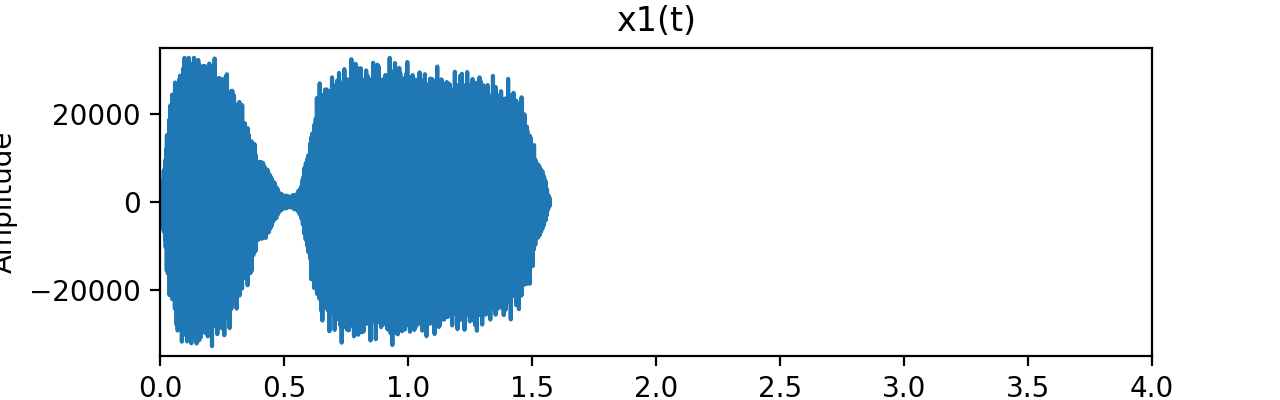

<IPython.core.display.Javascript object>


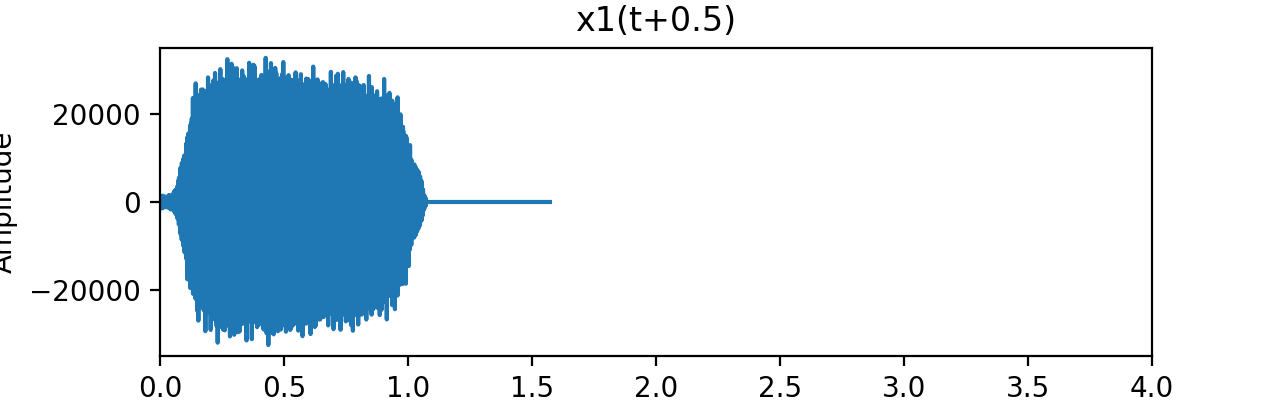

<IPython.core.display.Javascript object>


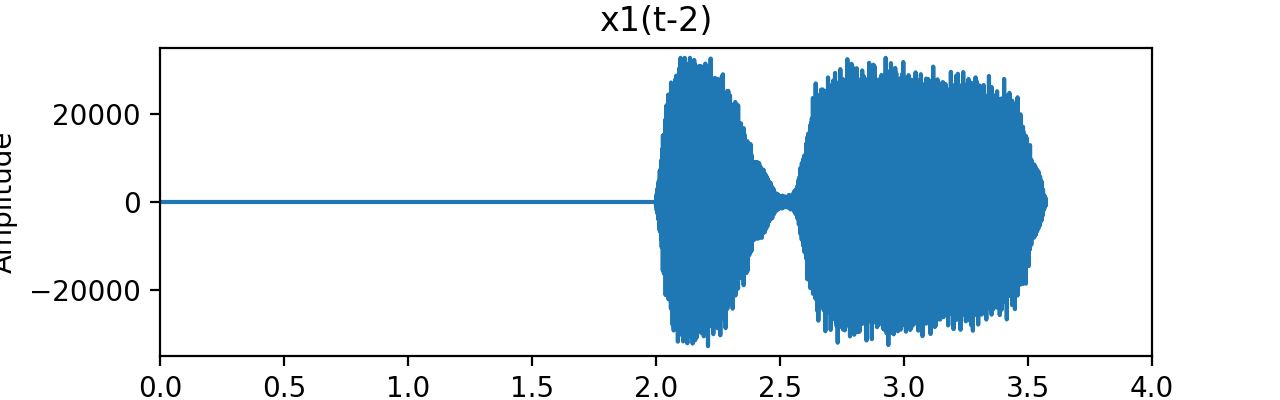

In [10]:
# Part A
# TODO: Code that solves A
def timeshift(x, fs, t0):
    n0 = abs(int(len(x) * (t0/(len(x)/fs))))
    if t0 > 0: # advance, shift left    
        y = np.concatenate((x[n0:], np.zeros(n0))) if n0 < len(x) else np.zeros(len(x)) # check if shift is bigger than original length
        t = np.arange(0, len(y), 1) * (1.0/fs)
        return y, t
    elif t0 < 0: # delay, shift right
        y = np.concatenate((np.zeros(n0), x))
        t = np.arange(0, len(y), 1) * (1.0/fs)
        return y, t
    else: # check if the shift is 0
        t = np.arange(0, len(x), 1) * (1.0/fs)
        return x, t

# Part B
# TODO: Code that solves B
_, t1 = timeshift(x1, fs1, 0)
x11, t11 = timeshift(x1, fs1, 0.5)
x111, t111 = timeshift(x1, fs1, -2)
plt.figure(5).set_figheight(2)
plt.plot(t1, x1)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("x1(t)")

plt.figure(6).set_figheight(2)
plt.plot(t11, x11)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("x1(t+0.5)")

plt.figure(7).set_figheight(2)
plt.plot(t111, x111)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("x1(t-2)")

plt.show()

# Part C
# TODO: Code that solves C
wavfile.write('./sounds/x1.wav', fs1, x1.astype(np.int16))
wavfile.write('./sounds/x11.wav', fs1, x11.astype(np.int16))
wavfile.write('./sounds/x111.wav', fs1, x111.astype(np.int16))

sa.WaveObject.from_wave_file('./sounds/x1.wav').play().wait_done()
sa.WaveObject.from_wave_file('./sounds/x11.wav').play().wait_done()
sa.WaveObject.from_wave_file('./sounds/x111.wav').play().wait_done()


### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

My solution already covers both cases, 
when the shift is zero, the `timeshift` function will just return the original audio.
when the advance shift is bigger tha nthe original signal, then will just return a blank audio with the same original length.
I have added comments at the code for the above implementations
